In [4]:
import sys
import os
REPO_DIR = "../"
sys.path.append(REPO_DIR)

In [5]:
import segmentation_models_pytorch as smp
import torch
import matplotlib.pyplot as plt
from PIL import Image
from scripts.preprocessing import *
from helpers.model_handler import *
from helpers.mask_to_submission import *

CREATE PREDICTIONS FROM PRETRAINED MODEL

In [6]:
# Parameters initialization
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'

TESTING_SIZE = 50
TEST_WRITE_DIR = REPO_DIR + 'predictions/'
SUBMISSION_DIR = REPO_DIR + 'submissions/'

cuda


In [7]:
# Load 50 test images into torch tensors and move them to device
test_data = extract_data(REPO_DIR + "dataset/test_set_images/", TESTING_SIZE, test=True)
test_data = torch.from_numpy(np.transpose(test_data, (0, 3, 1, 2)))
print(f"Test shape: {test_data.shape}")

test_data = test_data.to(DEVICE)

Loading /content/ml-project-2-pytyeee/dataset/test_set_images/test_1/test_1.png
Loading /content/ml-project-2-pytyeee/dataset/test_set_images/test_50/test_50.png
Test shape: torch.Size([50, 3, 608, 608])


In [8]:
# Load a given pretrained UNet model
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=1, # 1 for grayscale
    activation=ACTIVATION,
)
model = model.to(DEVICE)
model.load_state_dict(torch.load(REPO_DIR + 'models/model_2023-12-16_0.pt'))
model.eval()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 238MB/s]


<All keys matched successfully>

In [9]:
# Make the test predictions and apply threshold
pred_arrays = []
with torch.no_grad():
  pred = model(test_data)
  pred_arrays = torch.where(pred > 0.5, 1., 0.).cpu()

torch.Size([50, 1, 608, 608])


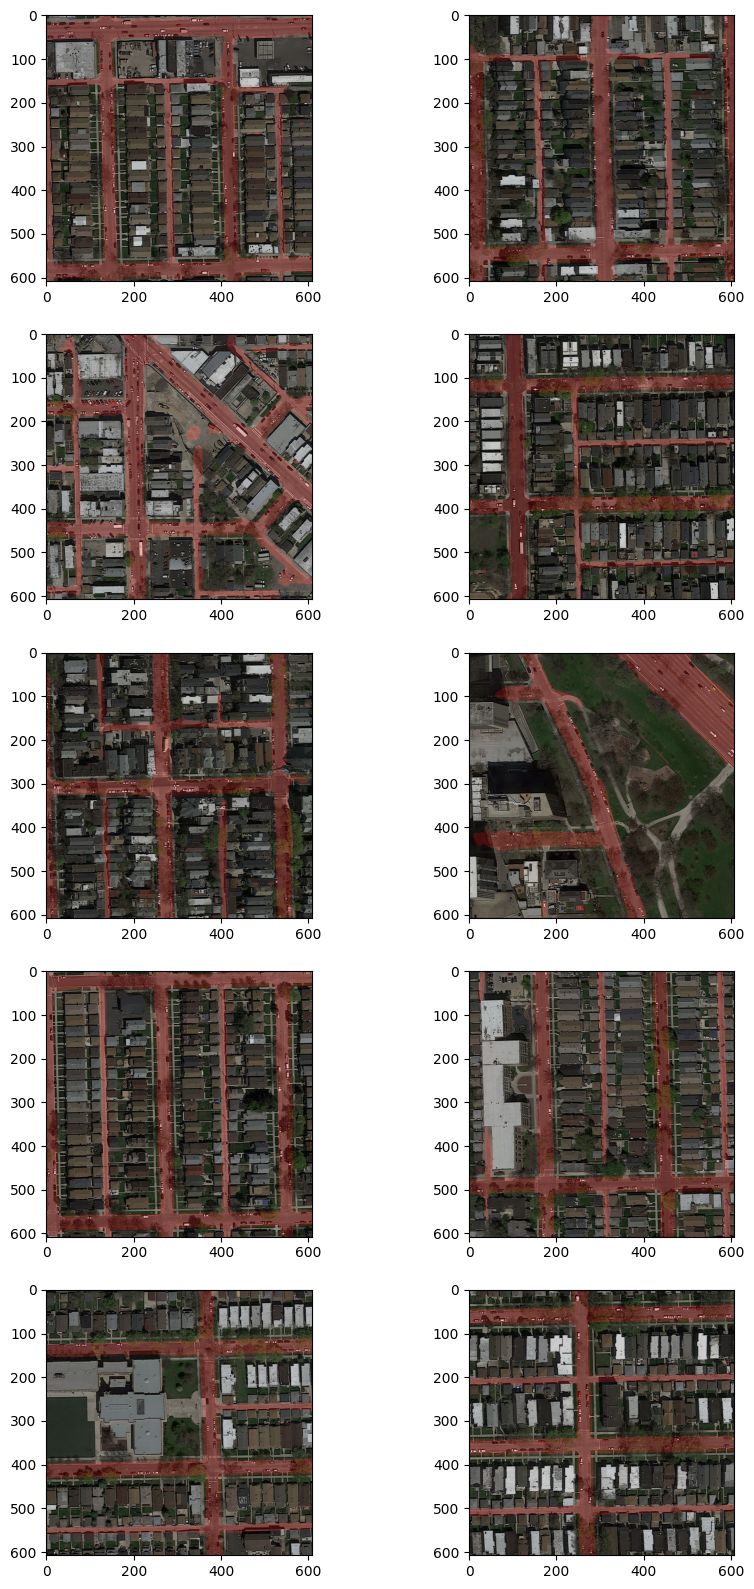

In [11]:
# Prepare for submission and visualize 10 predictions
pred_imgs = np.transpose(pred_arrays.numpy(), (0, 2, 3, 1)).squeeze()
imgs = np.transpose(test_data.cpu().numpy(), (0, 2, 3, 1))

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
for i in range(0, TESTING_SIZE, 5):
  axes[i//10, i % 2].imshow(make_img_overlay(imgs[i], pred_imgs[i]))
plt.show()

In [12]:
# Create folder for prediction files
if not os.path.isdir(TEST_WRITE_DIR):
  os.mkdir(TEST_WRITE_DIR)

# Create the 50 prediction files
for i in range(len(pred_imgs)):
  pred_img_name = TEST_WRITE_DIR + "prediction_" + "_%.3d" % (i+1) + ".png"
  pred_img_uint8 = img_float_to_uint8(pred_imgs[i])

  Image.fromarray(pred_img_uint8).save(pred_img_name)

Created the directory /content/ml-project-2-pytyeee/predictions/


In [13]:
# Create submission csv from the previously written prediction files
make_prediction_file(SUBMISSION_DIR, TEST_WRITE_DIR)

Created the directory /content/ml-project-2-pytyeee/submissions/
Making prediction file
['/content/ml-project-2-pytyeee/predictions/prediction__001.png', '/content/ml-project-2-pytyeee/predictions/prediction__002.png', '/content/ml-project-2-pytyeee/predictions/prediction__003.png', '/content/ml-project-2-pytyeee/predictions/prediction__004.png', '/content/ml-project-2-pytyeee/predictions/prediction__005.png', '/content/ml-project-2-pytyeee/predictions/prediction__006.png', '/content/ml-project-2-pytyeee/predictions/prediction__007.png', '/content/ml-project-2-pytyeee/predictions/prediction__008.png', '/content/ml-project-2-pytyeee/predictions/prediction__009.png', '/content/ml-project-2-pytyeee/predictions/prediction__010.png', '/content/ml-project-2-pytyeee/predictions/prediction__011.png', '/content/ml-project-2-pytyeee/predictions/prediction__012.png', '/content/ml-project-2-pytyeee/predictions/prediction__013.png', '/content/ml-project-2-pytyeee/predictions/prediction__014.png', '